In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [8]:
df=pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)


In [9]:
#importing tools

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score,recall_score
from sklearn.metrics import RocCurveDisplay,roc_curve,roc_auc_score,confusion_matrix

<Axes: >

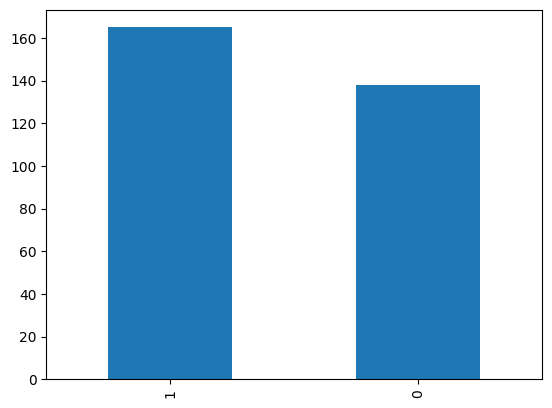

In [11]:
df['target'].value_counts().plot(kind='bar')

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: xlabel='sex'>

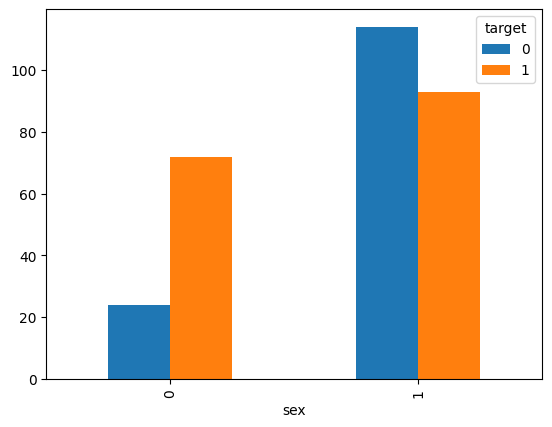

In [18]:
pd.crosstab(df.sex,df.target).plot(kind='bar')

<Axes: xlabel='cp'>

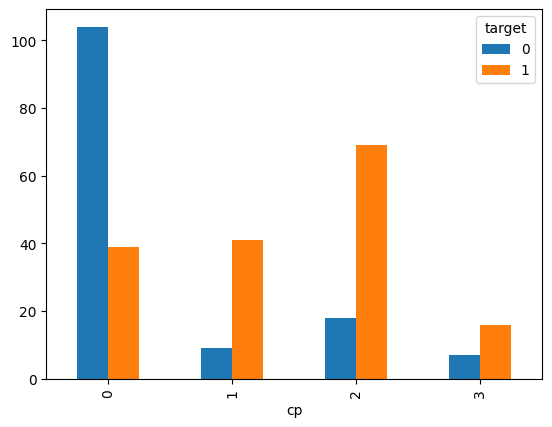

In [19]:
pd.crosstab(df.cp,df.target).plot(kind='bar')

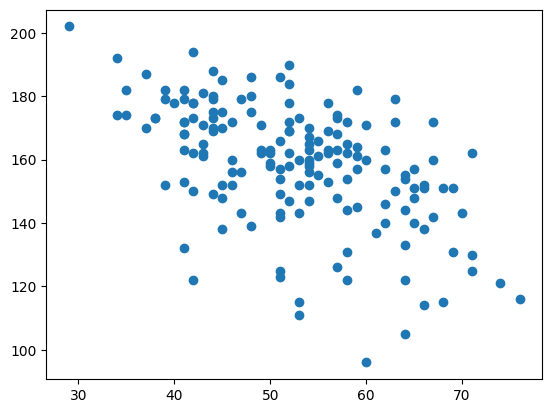

In [23]:
#age vs heartrate
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1])

<Axes: ylabel='Frequency'>

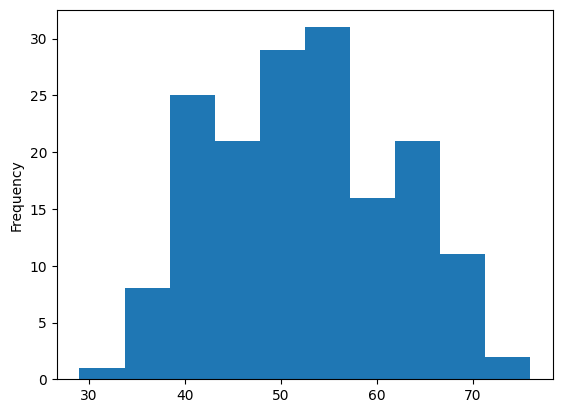

In [26]:
df.age[df.target==1].plot.hist()

<Axes: >

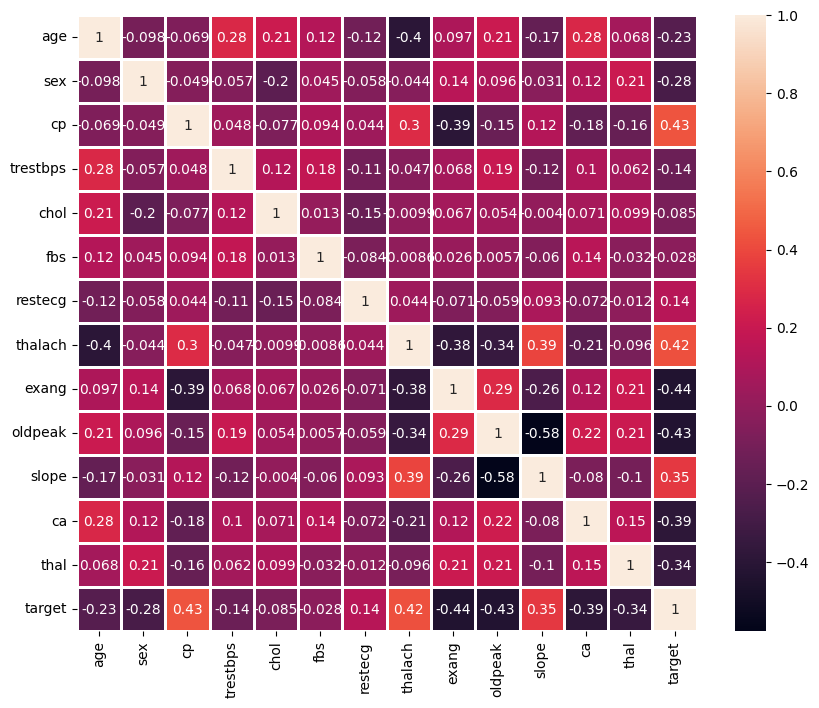

In [35]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True,linewidths=2)

In [10]:
#feature matrix and target matrix
x=df.drop('target',axis=1)
y=df['target']

In [11]:
#train test split
np.random.seed(80)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [12]:
#using 3 models
models={'logistic regression': LogisticRegression(),
       'knn':KNeighborsClassifier(),
       'random forest':RandomForestClassifier()}
score={}
def fit_and_score(models,xtrain,xtest,ytrain,ytest):
    np.random.seed(89)
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        score[name]=model.score(xtest,ytest)
    return score



    
    
    
 

In [15]:
scores=fit_and_score(models=models,xtrain=xtrain,xtest=xtest,ytrain=ytrain,ytest=ytest)
scores

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8360655737704918,
 'knn': 0.7049180327868853,
 'random forest': 0.9016393442622951}

<Axes: >

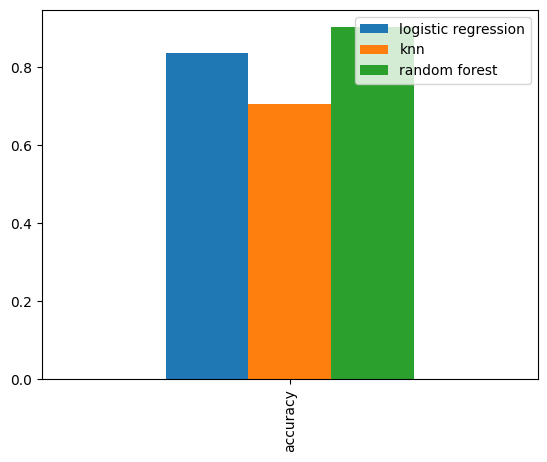

In [26]:
scores_df=pd.DataFrame(scores,index=['accuracy'])
scores_df.plot.bar()


In [30]:
#hyperparameter tuning for knn by hand
#tuning n_neighbors
k_score=[]
neighbors=range(1,51)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    k_score.append(knn.score(xtest,ytest))
k_score
    
    
    



[0.5081967213114754,
 0.4918032786885246,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.737704918032786

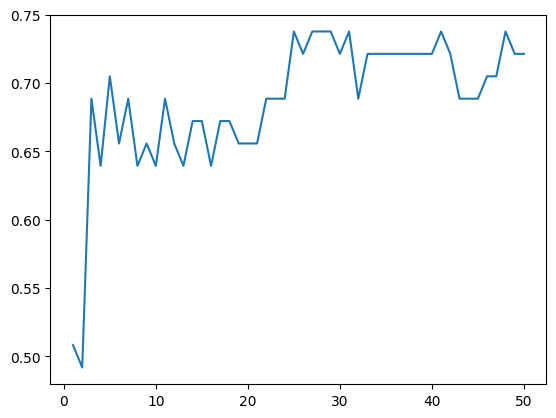

In [32]:
plt.plot(neighbors,k_score)


In [33]:
max(k_score)

0.7377049180327869

In [36]:
#hyperparameter tuning of logistic regression using randomisedsearchcv
lr=LogisticRegression()
lr.get_params()





{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
grid={'solver':['newton-cg', 'lbfg', 'liblinear', 'sag', 'saga'],
     'C':[100, 10, 1.0, 0.1, 0.01],
     'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
     'max_iter' : [100, 1000,2500, 5000]}
lr1=RandomizedSearchCV(estimator=lr,
                     param_distributions=grid,
                     n_iter=20,
                     cv=5)
lr_fit=lr1.fit(xtrain,ytrain)
lr_fit.score(xtest,ytest)




C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

0.8360655737704918

In [55]:
#hyperparameter tuning of randomforest
np.random.seed(90)
grid_rf={'n_estimators': np.arange(10,1000,10), 
       'min_samples_split': [2,5,10],
       'min_samples_leaf': [1,2,5],
       'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
       'criterion': ['log_loss','gini']}
rf=RandomForestClassifier()
rf1=RandomizedSearchCV(estimator=rf,
                     param_distributions=grid_rf,
                     n_iter=20,
                     cv=5)
rf_fit=rf1.fit(xtrain,ytrain)
rf_fit.score(xtest,ytest)
rf_fit.best_params_


{'n_estimators': 710,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 50,
 'criterion': 'log_loss'}

In [53]:
#hyperparameter tuning of logistic regression using gridsearchcv
np.random.seed(90)
grid2={'solver': ['saga'],
       'penalty':[ 'none'], 
       'max_iter': [5000], 
       'C': [1.0]}

lr2=GridSearchCV(estimator=lr,
                param_grid=grid2,
                cv=5)
lr2_fit=lr2.fit(xtrain,ytrain)
lr2_fit.score(xtest,ytest)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\

0.8032786885245902

In [68]:
#hyperparameter tuning using gridsearch in randomforest
np.random.seed(90)
grid_rf2={'n_estimators': [710],
          'bootstrap': [True, False],
          'min_samples_split': [2],
          'min_samples_leaf': [2],
          'max_depth': [50],
          'criterion': ['log_loss']}
rf=RandomForestClassifier()
rf2=GridSearchCV(estimator=rf,
                     param_grid=grid_rf2,
                     cv=5)
rf2_fit=rf2.fit(xtrain,ytrain)
rf2_fit.score(xtest,ytest)



0.9016393442622951

In [69]:
#validating rf
ypred=rf2_fit.predict(xtest)
ypred
accuracy_score(ytest,ypred)

0.9016393442622951

In [71]:
cross_val_score(rf2_fit,x,y,cv=5)

array([0.81967213, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

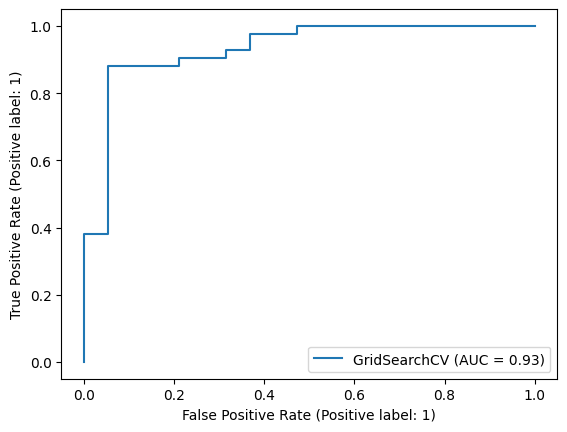

In [74]:

RocCurveDisplay.from_estimator(rf2_fit, xtest, ytest)

In [75]:
confusion_matrix(ytest,ypred)

array([[18,  1],
       [ 5, 37]], dtype=int64)

In [77]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.95      0.86        19\n           1       0.97      0.88      0.93        42\n\n    accuracy                           0.90        61\n   macro avg       0.88      0.91      0.89        61\nweighted avg       0.91      0.90      0.90        61\n'

In [81]:
cross_val_score(rf2_fit,x,y,cv=5,scoring='accuracy')



array([0.85245902, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [83]:
cross_val_score(rf2_fit,x,y,cv=5,scoring='recall')

array([0.87878788, 0.87878788, 0.81818182, 0.87878788, 0.87878788])